In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Get responder mapping

In [8]:
response=pd.read_csv("../data/M4_sample_mapping.csv")

In [9]:
mp_response=dict(zip(response["sample.id"],response["class"]))

In [10]:
response["class"].value_counts()

No-response    11
Responder       8
Stable          6
Name: class, dtype: int64

## Get RNA data

In [11]:
rna=pd.read_csv("../data/M4_rna.csv",skiprows=[0])

In [12]:
rna.head()
rna.shape

(2977, 26)

In [13]:
rna=rna.set_index("SYMBOL")

In [14]:
for x in rna.columns:
    rna[x]=rna[x]/rna[x].sum()

In [15]:
rna=rna*1000000

In [16]:
rna=rna.T

In [17]:
rna+=1
rna=np.log2(rna)

In [18]:
rna["group"]=rna.index.map(mp_response)

## boxplots for gene expression

In [19]:
mouse=pd.read_csv("../data/mart_export.txt",delimiter="\t")

In [20]:
mouse=mouse[~mouse["Gene name"].duplicated()]

In [21]:
rna.head()

SYMBOL,Aanat,Abca1,Abcg1,Acadl,Acads,Aco2,Acp5,Actg2,Adam11,Adam12,...,Gm10639,Tigit,Zfp831,Ddx43,Gm17359,Gm17455,Hbb-bs,Micalcl,Gm11127,group
1_145_EPG,0.834726,7.631199,5.161926,9.697721,8.542089,10.611301,4.505534,3.028138,3.119304,9.201518,...,7.438023,1.335431,0.506911,0.319943,0.000000,0.000000,10.237925,0.660096,4.758609,No-response
4_166_EPG,0.743433,7.835279,5.268386,9.662456,8.434436,10.719564,5.190500,3.105605,3.364384,9.505929,...,7.723283,2.377051,0.760684,1.256145,1.571205,0.000000,12.532658,1.483951,4.677185,No-response
5_168_EPG,2.055976,7.875106,5.922757,9.505065,8.386718,10.681289,5.498156,2.769498,3.656329,9.533529,...,7.788321,2.971382,1.669873,1.051211,0.730942,0.000000,9.510558,0.486366,5.674678,No-response
3_152_EPG,1.723407,8.223600,6.003007,9.755959,8.505405,10.585063,5.764969,3.672692,3.109881,9.651651,...,7.105241,1.881996,1.288756,0.629593,1.927979,0.684715,12.196990,3.326973,4.468665,No-response
2_146_EPG,0.434052,8.218466,5.732733,9.223516,8.246006,10.632422,5.774681,4.168030,3.285737,9.247660,...,6.598648,3.490334,1.727056,0.875181,1.834455,1.078157,10.247169,1.986662,5.300199,No-response


In [22]:
from scipy.stats import ttest_ind

In [23]:
cat1 = rna[rna["group"]=="Responder"]
cat2 = rna[rna["group"]=="No-response"]

Haus1
B2m
Slc25a40
Trex1
9530003J23Rik
Gm15448
Lair1
Ttest_indResult(statistic=4.9106065857038015, pvalue=0.00013217093351575325)
Psmd2
Ttest_indResult(statistic=5.139199162898392, pvalue=8.197651065326056e-05)
Ttest_indResult(statistic=6.291078378050262, pvalue=8.12637285394906e-06)
Ttest_indResult(statistic=4.964861860743424, pvalue=0.00011794569372251271)
Ttest_indResult(statistic=4.951694261926699, pvalue=0.00012124736067619624)


<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

<Figure size 144x360 with 0 Axes>

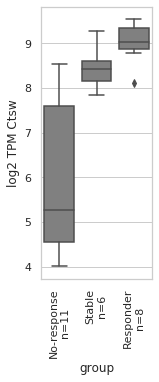

<Figure size 144x360 with 0 Axes>

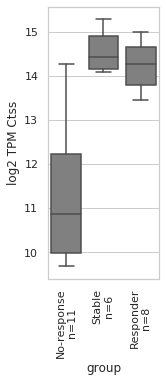

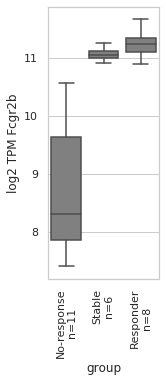

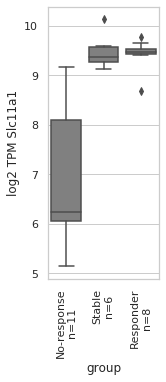

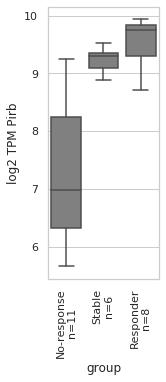

In [24]:
for x in mouse["Mouse gene name"].tolist()+["Pirb"]:
    try:
        sns.set(style="whitegrid", font_scale = 1)
        plt.figure(figsize=(2,5))
        ax=sns.boxplot(x="group", y=x,data=rna,color="gray")
        plt.ylabel("log2 TPM "+x)
        
        labels = [item.get_text() for item in ax.get_xticklabels()]
        labels=[x+"\nn="+str(len(rna[rna["group"]==x])) for x in labels]

        ax.set_xticklabels(labels)
        
        plt.xticks(rotation=90)
        plt.savefig("../plots/"+x+".pdf")
        print(ttest_ind(cat1[x], cat2[x]))
    except:
        print(x)
    

In [25]:
# for x in rna.columns.tolist()[0:100]:
#     try:
#         sns.set(style="whitegrid", font_scale = 1)
#         plt.figure(figsize=(5,5))
#         ax=sns.boxplot(x="group", y=x,data=rna,color="gray")
#         plt.ylabel("log2 TPM "+x)
#     except:
#         print(x)
    

## Get rna data

In [162]:
rna=pd.read_excel("../data/Four models.FPKM.45-gene.TIDE.xlsx",sheet_name=0,skiprows=[1,2])

In [163]:
mapping=pd.read_excel("../data/Four models.FPKM.45-gene.TIDE.xlsx",sheet_name=1)

In [164]:
mp_class=dict(zip(mapping["sample.id"],mapping["class"]))
mp_model=dict(zip(mapping["sample.id"],mapping["Model"]))

In [165]:
rna=rna.set_index("symbol")

In [166]:
rna=rna.T

In [167]:
rna["model"]=rna.index.map(mp_model)
rna["class"]=rna.index.map(mp_class)

In [168]:
rna=rna[~rna["model"].isnull()]

In [169]:
rna_plot=rna[mouse["Mouse gene name"].tolist()+["Pirb"]]

In [170]:
rna_plot=rna_plot.astype(float)
rna_plot=rna_plot.T

In [171]:
rna["class"].value_counts()

Anti-CTLA-4    17
IgG            13
Untreated       8
Control         1
Name: class, dtype: int64

In [172]:
colors=[]

for x in rna_plot.columns:
    if mp_class[x]=="Anti-CTLA-4":
        colors.append("red")
    elif mp_class[x]=="IgG":
        colors.append("green")
    elif mp_class[x]=="Untreated":
        colors.append("blue")
    else:
        colors.append("blue")

In [173]:
colors2=[]

for x in rna_plot.columns:
    if mp_model[x]=="M1":
        colors2.append("purple")
    elif mp_model[x]=="M2":
        colors2.append("pink")
    elif mp_model[x]=="M3":
        colors2.append("yellow")
    else:
        colors2.append("orange")

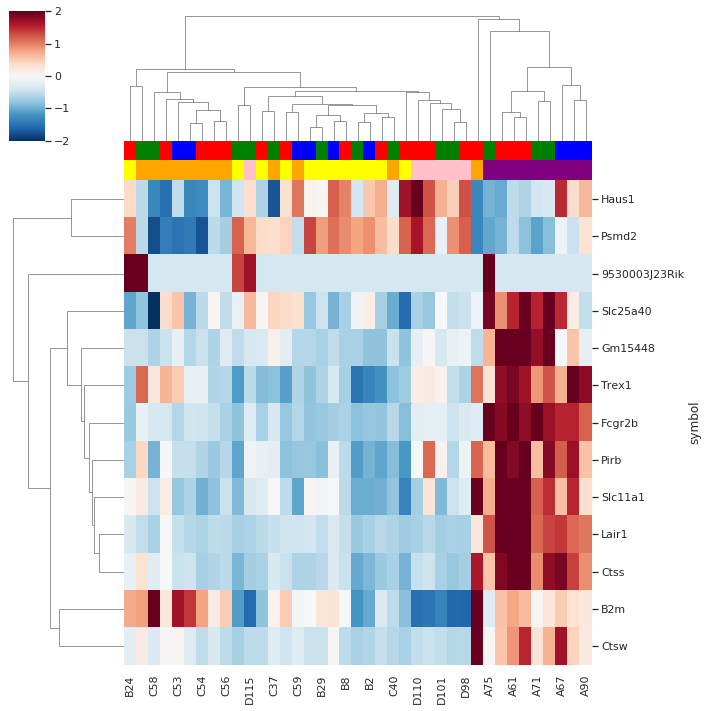

In [174]:
sns.clustermap(rna_plot,z_score=0,cmap="RdBu_r",col_colors=[colors,colors2],vmin=-2,vmax=2)

In [175]:
human=pd.read_csv("../data/icb-variant-characterization.tsv",delimiter="\t")
human.head()

,#CHROM,POS,ID,REF,ALT,A1,TEST,OBS_CT,BETA,SE,...,P,ERRCODE,file,FIRTH?,OR,LOG(OR)_SE,Z_STAT,BETA_match,-log10p,index
0,1,1421752.0,1:1421752:G:A,G,A,A,ADD,34.0,0.157949,NaN,...,0.801516,.,rizvi,N,1.438630,1.446750,0.251385,-0.157949,0.096088,0
1,1,150678910.0,1:150678910:T:C,T,C,C,ADD,34.0,0.356167,NaN,...,0.498797,.,rizvi,N,2.270740,1.212480,0.676384,-0.356167,0.302076,0
2,1,161600109.0,1:161600109:C:T,C,T,T,ADD,34.0,0.064286,NaN,...,0.954727,.,rizvi,Y,1.159540,2.607400,0.056772,0.064286,0.020121,0
3,1,89473624.0,1:89473624:G:A,G,A,A,ADD,34.0,-0.164179,NaN,...,0.619417,.,rizvi,N,0.685205,0.761135,-0.496676,-0.164179,0.208017,0
4,1,89478868.0,1:89478868:G:A,G,A,A,ADD,34.0,-0.302042,NaN,...,0.458070,.,rizvi,N,0.498836,0.937266,-0.742029,-0.302042,0.339068,0


In [176]:
human["gene"]=human["file"].str.split(".").str[0]

In [177]:
human_filt=human[human["gene"].isin(mouse["Gene name"].tolist())]

In [178]:
human_filt=human_filt[["ID","gene","BETA"]]
human_filt=human_filt.pivot(index="gene",columns="ID",values="BETA")

In [179]:
human_filt

ID,10:71880791:C:G,11:65561369:G:A,12:69744014:C:A,15:42439444:C:T,18:43703223:C:G,19:52130638:C:A,19:54754385:T:G,19:54848589:C:G,19:54848986:C:T,19:55025471:C:A,...,1:1421752:G:A,1:150678910:T:C,1:161600109:C:T,1:89473624:G:A,1:89478868:G:A,1:89735314:G:A,2:219259844:A:G,3:184026703:C:T,3:48508585:C:T,3:48720303:G:A
gene,,,,,,,,,,,,,,,,,,,,,
B2M,-0.346145,-0.050403,0.462272,-0.283870,-0.287587,0.594677,-0.456785,0.085652,0.084225,0.276828,...,-0.226586,-0.062459,0.184702,0.222500,0.115631,0.295319,0.010759,0.008122,-0.041615,-0.145288
CTSS,-0.429708,-0.030768,0.934125,-1.074340,-0.113552,0.670202,-0.855894,-0.060707,0.224313,0.413487,...,-0.503045,0.018924,0.518533,0.442397,0.101641,0.313073,0.348375,0.203940,0.398755,0.072071
CTSW,-0.050158,0.094609,0.315663,-0.272569,-0.165648,0.465375,0.027317,-0.113853,-0.270478,0.337957,...,-0.105637,-0.233605,0.229577,0.227415,-0.035949,0.375108,0.067521,0.023248,-0.049720,-0.097936
FCGR2B,-0.244067,-0.035042,-0.034027,-0.901716,-0.629930,0.274200,-0.705339,0.213768,0.189662,0.474200,...,-0.621307,0.094512,0.748891,0.353520,-0.101094,-0.304660,0.534522,0.188568,0.557890,0.018853
HAUS1,-0.157673,0.237547,0.051727,-0.241401,0.063534,0.360767,-0.141015,0.109499,0.010525,0.154288,...,0.077521,-0.020748,-0.278763,-0.036556,0.002602,-0.028204,-0.020106,0.091551,0.071431,-0.064621
LAIR1,-0.549257,0.220209,0.764972,-0.891233,-0.275644,0.449643,-0.351270,-0.012179,0.281427,0.310824,...,-0.581133,0.196144,0.939546,0.712331,-0.076815,0.032120,0.175302,0.324538,0.304920,0.029124
LILRB2,-0.254805,0.169939,-0.085578,-0.574596,-0.300920,0.132641,-0.721381,-0.124990,-0.205338,0.250233,...,-0.156734,-0.018884,0.205728,0.253121,-0.158981,-0.201617,-0.085604,-0.006457,0.266285,-0.081116
LYZ,-0.306042,0.293413,0.522923,-1.264780,0.002443,0.817627,-0.476413,0.135821,0.256752,0.667878,...,-0.237592,-0.019125,0.905308,0.286447,-0.044371,0.168651,0.327687,0.108728,0.589986,-0.083234
PSMD2,0.009568,0.212248,0.141969,-0.119892,-0.138919,0.104315,0.026326,0.078744,-0.070109,0.014966,...,0.248017,-0.051102,0.284399,0.104346,0.168688,-0.018078,-0.038334,-0.020919,0.021296,-0.091988


In [180]:
mp_mouse=dict(zip(mouse["Mouse gene name"],mouse["Gene name"]))
rna_plot.index=rna_plot.index.map(mp_mouse)

In [181]:
rna_plot=rna_plot[~(rna_plot.index.isnull())]

In [182]:
["gene"]+rna_plot.index.tolist()

['gene',
 'HAUS1',
 'B2M',
 'SLC25A40',
 'TREX1',
 'LYZ',
 'LILRB2',
 'LAIR1',
 'CTSW',
 'PSMD2',
 'CTSS',
 'FCGR2B',
 'SLC11A1']

In [183]:
human_filt

ID,10:71880791:C:G,11:65561369:G:A,12:69744014:C:A,15:42439444:C:T,18:43703223:C:G,19:52130638:C:A,19:54754385:T:G,19:54848589:C:G,19:54848986:C:T,19:55025471:C:A,...,1:1421752:G:A,1:150678910:T:C,1:161600109:C:T,1:89473624:G:A,1:89478868:G:A,1:89735314:G:A,2:219259844:A:G,3:184026703:C:T,3:48508585:C:T,3:48720303:G:A
gene,,,,,,,,,,,,,,,,,,,,,
B2M,-0.346145,-0.050403,0.462272,-0.283870,-0.287587,0.594677,-0.456785,0.085652,0.084225,0.276828,...,-0.226586,-0.062459,0.184702,0.222500,0.115631,0.295319,0.010759,0.008122,-0.041615,-0.145288
CTSS,-0.429708,-0.030768,0.934125,-1.074340,-0.113552,0.670202,-0.855894,-0.060707,0.224313,0.413487,...,-0.503045,0.018924,0.518533,0.442397,0.101641,0.313073,0.348375,0.203940,0.398755,0.072071
CTSW,-0.050158,0.094609,0.315663,-0.272569,-0.165648,0.465375,0.027317,-0.113853,-0.270478,0.337957,...,-0.105637,-0.233605,0.229577,0.227415,-0.035949,0.375108,0.067521,0.023248,-0.049720,-0.097936
FCGR2B,-0.244067,-0.035042,-0.034027,-0.901716,-0.629930,0.274200,-0.705339,0.213768,0.189662,0.474200,...,-0.621307,0.094512,0.748891,0.353520,-0.101094,-0.304660,0.534522,0.188568,0.557890,0.018853
HAUS1,-0.157673,0.237547,0.051727,-0.241401,0.063534,0.360767,-0.141015,0.109499,0.010525,0.154288,...,0.077521,-0.020748,-0.278763,-0.036556,0.002602,-0.028204,-0.020106,0.091551,0.071431,-0.064621
LAIR1,-0.549257,0.220209,0.764972,-0.891233,-0.275644,0.449643,-0.351270,-0.012179,0.281427,0.310824,...,-0.581133,0.196144,0.939546,0.712331,-0.076815,0.032120,0.175302,0.324538,0.304920,0.029124
LILRB2,-0.254805,0.169939,-0.085578,-0.574596,-0.300920,0.132641,-0.721381,-0.124990,-0.205338,0.250233,...,-0.156734,-0.018884,0.205728,0.253121,-0.158981,-0.201617,-0.085604,-0.006457,0.266285,-0.081116
LYZ,-0.306042,0.293413,0.522923,-1.264780,0.002443,0.817627,-0.476413,0.135821,0.256752,0.667878,...,-0.237592,-0.019125,0.905308,0.286447,-0.044371,0.168651,0.327687,0.108728,0.589986,-0.083234
PSMD2,0.009568,0.212248,0.141969,-0.119892,-0.138919,0.104315,0.026326,0.078744,-0.070109,0.014966,...,0.248017,-0.051102,0.284399,0.104346,0.168688,-0.018078,-0.038334,-0.020919,0.021296,-0.091988


In [184]:
#human_filt=human_filt.pivot(index="gene",columns="ID",values="BETA")
human_filt=human_filt.loc[rna_plot.index.tolist()]

In [185]:
human_filt.head()

ID,10:71880791:C:G,11:65561369:G:A,12:69744014:C:A,15:42439444:C:T,18:43703223:C:G,19:52130638:C:A,19:54754385:T:G,19:54848589:C:G,19:54848986:C:T,19:55025471:C:A,...,1:1421752:G:A,1:150678910:T:C,1:161600109:C:T,1:89473624:G:A,1:89478868:G:A,1:89735314:G:A,2:219259844:A:G,3:184026703:C:T,3:48508585:C:T,3:48720303:G:A
gene,,,,,,,,,,,,,,,,,,,,,
HAUS1,-0.157673,0.237547,0.051727,-0.241401,0.063534,0.360767,-0.141015,0.109499,0.010525,0.154288,...,0.077521,-0.020748,-0.278763,-0.036556,0.002602,-0.028204,-0.020106,0.091551,0.071431,-0.064621
B2M,-0.346145,-0.050403,0.462272,-0.283870,-0.287587,0.594677,-0.456785,0.085652,0.084225,0.276828,...,-0.226586,-0.062459,0.184702,0.222500,0.115631,0.295319,0.010759,0.008122,-0.041615,-0.145288
SLC25A40,0.010937,0.154024,-0.003284,-0.317222,0.015774,0.157072,-0.011880,0.115521,-0.044075,0.048025,...,-0.034348,-0.123372,0.092139,-0.098126,0.071112,0.100830,-0.063679,0.078421,-0.003518,-0.160123
TREX1,-0.043738,-0.172023,0.283685,-0.238776,-0.085358,0.091139,-0.040683,0.024675,0.051780,0.081469,...,0.142167,-0.086134,0.321601,0.035034,-0.112885,-0.198448,0.136556,0.034181,-0.031178,-0.075253
LYZ,-0.306042,0.293413,0.522923,-1.264780,0.002443,0.817627,-0.476413,0.135821,0.256752,0.667878,...,-0.237592,-0.019125,0.905308,0.286447,-0.044371,0.168651,0.327687,0.108728,0.589986,-0.083234


In [192]:
var=[]
sample=[]
value=[]

for x in human_filt.columns:
    for y in rna_plot.columns:
        var.append(x)
        sample.append(y)
        corr=rna_plot[y].corr(human_filt[x],method="spearman")
        value.append(corr)

In [193]:
df=pd.DataFrame({"variant":var,"sample":sample,"value":value})

In [194]:
df_plot=df.pivot(columns="variant",index="sample",values="value")
df_plot=df_plot.T

In [195]:
colors=[]

for x in df_plot.columns:
    if mp_class[x]=="Anti-CTLA-4":
        colors.append("red")
    elif mp_class[x]=="IgG":
        colors.append("green")
    elif mp_class[x]=="Untreated":
        colors.append("blue")
    else:
        colors.append("blue")

In [196]:
colors2=[]

for x in df_plot.columns:
    if mp_model[x]=="M1":
        colors2.append("purple")
    elif mp_model[x]=="M2":
        colors2.append("pink")
    elif mp_model[x]=="M3":
        colors2.append("yellow")
    else:
        colors2.append("orange")

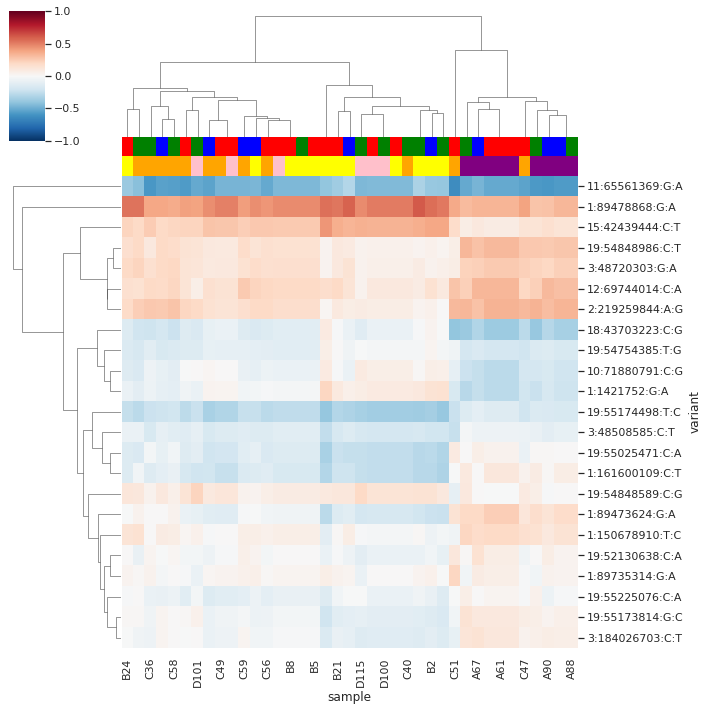

In [197]:
sns.clustermap(df_plot,vmin=-1,vmax=1,cmap="RdBu_r",col_colors=[colors,colors2])